# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

**Base de Dados:** https://www.gapminder.org/data/documentation/gd004/ &
                   https://data.worldbank.org/indicator/NY.GDP.MKTP.KD

## Pergunta(s):

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram? Além do PIB, a expectativa de vida também aumentou proporcionalmente ao PIB?

**Anos de interesse:**

>de 1971 até 1991 - 20 anos antes de existir o SADC
 
>de 1992 até 2010 - 20 anos após o SADC existir

## Hipótese:

Os países que entraram na SADC tiveram seu PIB elevado pois, por ser uma organização que visa o crescimento econômico dos países participantes, há uma maior exportação e melhoria na economia do país como um todo.** -- OLHAR DENOVO ESSA HIPOTESE!

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dorad\OneDrive\Documentos\Insper\2 Semestre\2.CienDados\Projeto1


Lê os arquivos que vamos utilizar no projeto:

In [3]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')

In [4]:
vida = pd.read_excel('life_expectancy_years.xlsx')

Altera o índice das tabelas:

In [5]:
dados_indice = dados.set_index("country")
vida_indice = vida.set_index("country")

Países pertencentes ao Bloco SADC (áfrica austral):

In [6]:
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]

Paises da áfrica que não pertencem ao Bloco SADC:

In [7]:
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

Lista total de Anos

In [8]:
anos = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

Lista da primeira metade

In [9]:
anos_1 = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]

Lista da segunda metade

In [10]:
anos_2 = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

In [11]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0
dados_indice.loc[af_aus,"AF_AUS"]=1    #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

dados_indice.loc[:, "AF_NAO_AUS"] = 0     #criar uma coluna chamada AF_NAO_AUS e falar que todos os países são 0
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1   #falar que todos os países da lista af_nao_aus recebem o valor de 1 na coluna AF_NAO_AUS

vida_indice.loc[:, "AF_AUS"] = 0
vida_indice.loc[af_aus,"AF_AUS"]=1

vida_indice.loc[:, "AF_NAO_AUS"] = 0
vida_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1

In [12]:
dados_af_aus = dados_indice.loc[af_aus]
     #imprime todos os paises que sao do SADC

dados_af_nao_aus = dados_indice.loc[af_nao_aus]
     #imprime todos os paises que sao da africa mas nao sao da SADC

vida_af_aus = vida_indice.loc[af_aus]

vida_af_nao_aus = vida_indice.loc[af_nao_aus]

In [19]:
africa = af_aus + af_nao_aus
dados_africa = dados_indice.loc[africa]

In [20]:
transpor_aus = dados_af_aus.transpose()
transpor_quant_aus = transpor_aus[:-2]

aus_anos1 = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<1992),:].transpose()
soma_aus_anos1 = aus_anos1.sum()

aus_anos2 = transpor_quant_aus.loc[(transpor_quant_aus.index>1991) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos2 = aus_anos2.sum()

aus_anos_total = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos_total = aus_anos_total.sum() ##

soma_aus_total = soma_aus_anos1 + soma_aus_anos2

In [21]:
transpor_nao_aus = dados_af_nao_aus.transpose()
transpor_quant_nao_aus = transpor_nao_aus[:-2]

nao_aus_anos1 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<1992),:].transpose()
soma_nao_aus_anos1 = nao_aus_anos1.sum()

nao_aus_anos2 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1991) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos2 = nao_aus_anos2.sum()

nao_aus_anos_total = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos_total = nao_aus_anos_total.sum() ##

soma_nao_aus_total = soma_nao_aus_anos1 + soma_nao_aus_anos2

In [24]:
transpor = dados_africa.transpose()
transpor_quant = transpor[:-2]

africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
soma_africa_anos1 = africa_anos1.sum()

africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos2 = africa_anos2.sum()

africa_anos_total = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos_total = africa_anos_total.sum()

soma_africa_total = soma_africa_anos1 + soma_africa_anos2

In [1]:
africa_anos_total.loc[:, "AF_AUS"] = 0
africa_anos_total.loc[af_aus,"AF_AUS"]=1

africa_anos_total.loc[:, "AF_NAO_AUS"] = 0
africa_anos_total.loc[af_nao_aus,"AF_NAO_AUS"]=1

africa_anos_total  #Imprime todos os paises da África no período de tempo selecionado e indica quais
#                   sao da SADC e quais não são

NameError: name 'africa_anos_total' is not defined

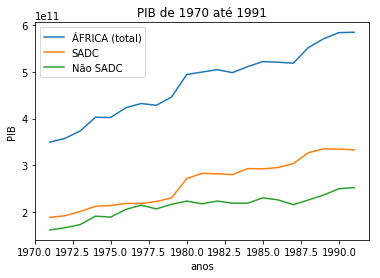

In [42]:
plt.plot(anos_1, soma_africa_anos1, label="ÁFRICA (total)")
plt.plot(anos_1, soma_aus_anos1, label="SADC")
plt.plot(anos_1, soma_nao_aus_anos1, label="Não SADC")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 1991")
plt.legend()
plt.show()

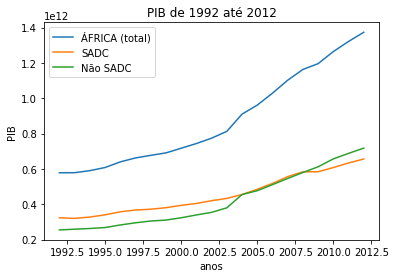

In [43]:
#SOMA AFRICA TOTAL (ANOS 2 + ANOS1) TA DANDO NAN

plt.plot(anos_2, soma_africa_anos2, label="ÁFRICA (total)")
plt.plot(anos_2, soma_aus_anos2, label="SADC")
plt.plot(anos_2, soma_nao_aus_anos2, label="Não SADC")  # soma_aus e soma_nao_aus tao dando os mesmos valores!
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1992 até 2012")
plt.legend()
plt.show()

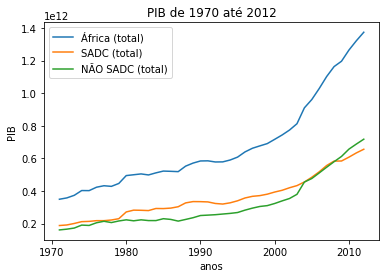

In [28]:
#plt.plot(anos_2, soma_africa_anos2, label="ÁFRICA após (total)") -- com a divisao 
#plt.plot(anos_1, soma_africa_anos1, label="ÁFRICA antes (total)") -- com a divisao
#plt.plot(anos_2, soma_aus_anos2, label="SADC após") -- com a divisao
#plt.plot(anos_1, soma_aus_anos1, label="SADC antes") -- com a divisao
#plt.plot(anos_2, soma_nao_aus_anos2, label="Não SADC após") -- com a divisao
#plt.plot(anos_1, soma_nao_aus_anos1, label="Não SADC antes") -- com a divisao
plt.plot(anos, soma_africa_anos_total, label="África (total)")
plt.plot(anos, soma_aus_anos_total, label="SADC (total)" )
plt.plot(anos, soma_nao_aus_anos_total, label="NÃO SADC (total)")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 2012")
plt.legend()
plt.show()

# ISSO É COMO O GRÁFICO DO TOTAL (CÉLULA DE BAIXO) DEVE PARECER >> fiz o total com o intervalo de tempo maior
# Divisão: entre os dois intervalos de tempo definidos (com uma "falha" no gráfico)-- a falha é intencional!

In [30]:
dados_af_aus1 = africa_anos1.loc[af_aus]
print('PIB total dos países da SADC de 1971 à 1991')
dados_af_aus1.sum().sum() / 14

PIB total dos países da SADC de 1971 à 1991


394528142857.1429

In [31]:
dados_af_aus2 = africa_anos2.loc[af_aus]
print('PIB total dos países da SADC de 1992 à 2012')
dados_af_aus2.sum().sum() / 14

PIB total dos países da SADC de 1992 à 2012


679862857142.8572

In [32]:
print('Diferença por pais entre os intervalos de tempo dos paises da SADC')
(dados_af_aus2.sum().sum() - dados_af_aus1.sum().sum()) / 14
#FAZER EM PORCENTAGEM !!!! (O AUMENTO PERCENTUAL) -- OU FAZER A MÉDIA DE CADA E O AUMENTO PERCENTUAL DA MÉDIA!!!

Diferença por pais entre os intervalos de tempo dos paises da SADC


285334714285.7143

In [33]:
dados_af_nao_aus1 = africa_anos1.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1971 à 1991')
dados_af_nao_aus1.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1971 à 1991


165056629629.62964

In [34]:
dados_af_nao_aus2 = africa_anos2.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1992 à 2012')
dados_af_nao_aus2.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1992 à 2012


328766962962.96295

In [35]:
print('Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC')
(dados_af_nao_aus2.sum().sum() - dados_af_nao_aus1.sum().sum()) / 27

Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC


163710333333.33334

In [36]:
#OBS: O af_nao_aus tem praticamente o dobro de paises que o af_aus! tem que arranjar um jeito de ser proporcional!
# --- fazer a média? (é eficiente?  / o melhor jeito?)

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

> A ser respondida de acordo com a progressão do projeto!